In [ ]:
!wget https://www.dropbox.com/sh/o64ln4ln6ko692e/AAABkLLtzudXjXCMgt8Db8Pda?dl=0

--2021-05-23 11:28:35--  https://www.dropbox.com/sh/o64ln4ln6ko692e/AAABkLLtzudXjXCMgt8Db8Pda?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/o64ln4ln6ko692e/AAABkLLtzudXjXCMgt8Db8Pda [following]
--2021-05-23 11:28:35--  https://www.dropbox.com/sh/raw/o64ln4ln6ko692e/AAABkLLtzudXjXCMgt8Db8Pda
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc314a7f8e42d5c5ebc922d99a2f.dl.dropboxusercontent.com/zip_download_get/AyY0r-l48pJDnhWx_hGg8zA35xfCKEkb2vTg5VushDY0D3awOpJBx3UHv-amVfzJI_Su_mEzJgatDK7mKAI6tvH9HsGx6zHAm_rHPkdgDwuOGw# [following]
--2021-05-23 11:28:36--  https://uc314a7f8e42d5c5ebc922d99a2f.dl.dropboxusercontent.com/zip_download_get/AyY0r-l48pJDnhWx_hGg8zA35xfCKEkb2vTg5VushDY0D3awOpJBx3UHv-amVfzJI_Su_mEzJgatDK7m

In [ ]:
#first rename dataset then unzip
!unzip covid-19dataset

In [ ]:
#setting trainning and validation path in the extracted folder
TRAIN_PATH="CovidDataset/Train"
VAL_PATH="CovidDataset/Val"

In [ ]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import tensorflow


In [ ]:

#CNN model in Keras
#Sequential model
#layered architecture
#we are creating 3-4 CNN layers with some classification layers
#first we put a convolutional layer with 32 filers
#adding two layers increases the non-linearity and reduce the number of parameters
#as we go deeper into the network we increase the number of filters because as we go deeper the numeber of distinct patterns we see are more


model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))  #single neuron
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [ ]:
model.summary()
#flatten is to convert matrix into vector

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
layer_outputs=[layer.output for layer in model.layers[1:]]


In [ ]:
visualize_model= tensorflow.keras.models.Model(inputs=model.input, outputs=layer_outputs)


In [ ]:
img=load_img('./CovidDataset/Train/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg', target_size=(224,224))


In [ ]:
x=img_to_array(img)
x.shape


(224, 224, 3)

In [ ]:
x=x.reshape((1,224,224,3))
print(x.shape)


(1, 224, 224, 3)


In [ ]:
x=x/255


In [ ]:
feature_maps=visualize_model.predict(x)
print(len(feature_maps))


13


In [ ]:
layer_names=[layer.name for layer in model.layers]
print(layer_names)


['conv2d', 'conv2d_1', 'max_pooling2d', 'dropout', 'conv2d_2', 'max_pooling2d_1', 'dropout_1', 'conv2d_3', 'max_pooling2d_2', 'dropout_2', 'flatten', 'dense', 'dropout_3', 'dense_1']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


conv2d (1, 220, 220, 64)
conv2d_1 (1, 110, 110, 64)
max_pooling2d (1, 110, 110, 64)
dropout (1, 108, 108, 64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


conv2d_2 (1, 54, 54, 64)
max_pooling2d_1 (1, 54, 54, 64)
dropout_1 (1, 52, 52, 128)
conv2d_3 (1, 26, 26, 128)
max_pooling2d_2 (1, 26, 26, 128)
dropout_2 (1, 86528)
flatten (1, 64)
dense (1, 64)
dropout_3 (1, 1)


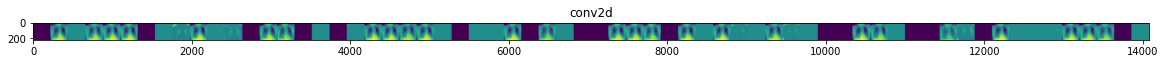

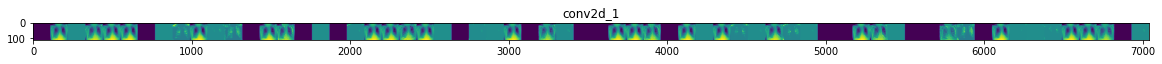

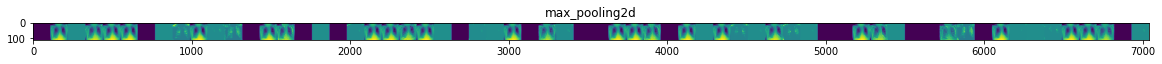

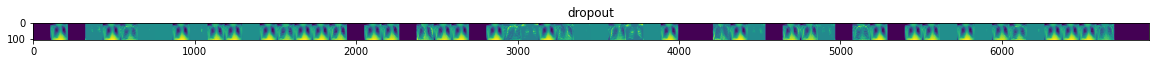

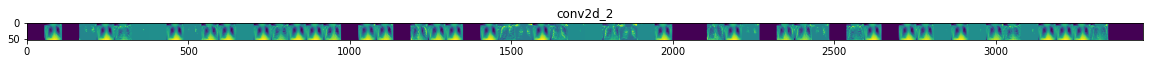

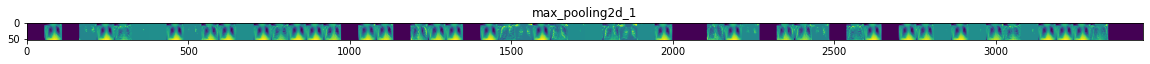

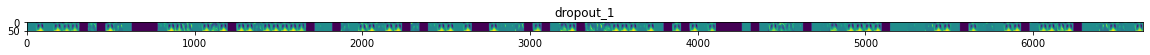

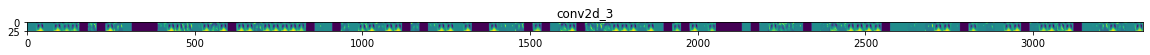

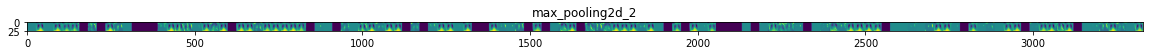

In [ ]:

# Plotting the graph
for layer_names, feature_maps in zip(layer_names,feature_maps):
  print(layer_names, feature_maps.shape)
  if len(feature_maps.shape) == 4 :
    channels = feature_maps.shape[-1]
    size = feature_maps.shape[1]
    display_grid = np.zeros((size, size * channels))
    for i in range(channels):
      x = feature_maps[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    scale = 20. / channels
    plt.figure(figsize=(scale * channels, scale))
    plt.title(layer_names)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


In [ ]:
filters = model.layers[2].get_weights()
print(filters)


[]


conv2d
32


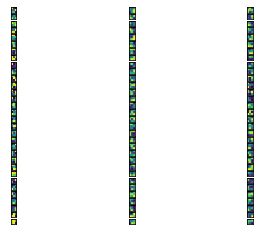

conv2d_1
64


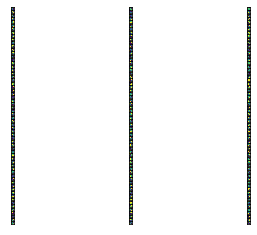

conv2d_2
64


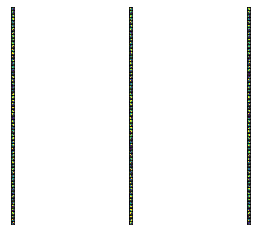

conv2d_3
128


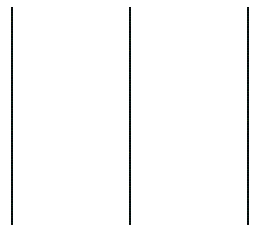

In [ ]:
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()


In [ ]:
#trainning from scratch
#we use keras image generator library
#we can't do vertical flip as all the x-ray should have same orientation

train_datagen= image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_dataset=image.ImageDataGenerator(rescale=1./255)


In [ ]:

#it automatically picks all the images from the directory and converts it to 224,224

train_generator=train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)


Found 332 images belonging to 2 classes.


In [ ]:

train_generator.class_indices


{'Covid': 0, 'Normal': 1}

In [ ]:

validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 45 images belonging to 2 classes.


In [ ]:

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps=2
)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
8/8 [==============================] - 67s 9s/step - loss: 1.9320 - accuracy: 0.5513 - val_loss: 0.6788 - val_accuracy: 0.6667
Epoch 2/30
8/8 [==============================] - 65s 9s/step - loss: 0.6753 - accuracy: 0.5818 - val_loss: 0.6027 - val_accuracy: 0.9333
Epoch 3/30
8/8 [==============================] - 65s 8s/step - loss: 0.5542 - accuracy: 0.7609 - val_loss: 0.4281 - val_accuracy: 0.9333
Epoch 4/30
8/8 [==============================] - 65s 8s/step - loss: 0.5549 - accuracy: 0.7362 - val_loss: 0.3639 - val_accuracy: 0.9556
Epoch 5/30
8/8 [==============================] - 64s 9s/step - loss: 0.3471 - accuracy: 0.8333 - val_loss: 0.1290 - val_accuracy: 0.9778
Epoch 6/30
8/8 [==============================] - 65s 8s/step - loss: 0.3131 - accuracy: 0.9118 - val_loss: 0.2503 - val_accuracy: 1.0000
Epoch 7/30
8/8 [==============================] - 65s 8s/step - loss: 0.2759 - accuracy: 0.8989 - val_loss: 0.1292 - val_accuracy: 0.9778
Epoch 8/30
8/8 [==================

In [ ]:
model.save("model.h5")


In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes = True).create(prog='dot', format='svg'))

In [ ]:
from google.colab import files
files.download("model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

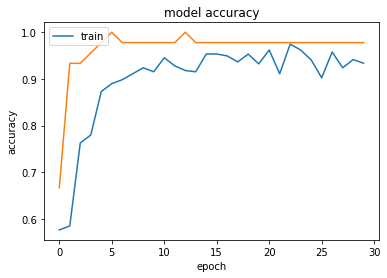

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


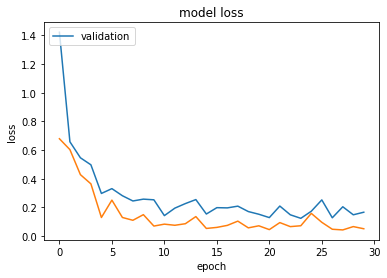

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.legend(['validation'], loc='upper left')
plt.show()


In [ ]:
model.evaluate_generator(train_generator)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.10671922564506531, 0.9698795080184937]

In [ ]:
model.evaluate_generator(validation_generator)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.05052575096487999, 0.9777777791023254]

In [ ]:
#test images
model=load_model("model.h5")

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual=[]
y_test=[]

In [ ]:
import os
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img, axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img, axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_actual,y_test)

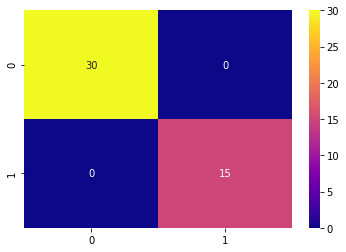

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap="plasma", annot=True)